In [1]:
import numpy as np
import pandas as pd

import scipy 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import zscore

import seaborn as sb
import matplotlib.pyplot as plt

import sklearn 
from sklearn.cluster import AgglomerativeClustering 
import sklearn.metrics as sm

import statistics 
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('churn.csv')
df.head(10)

,ID,londdist,International,local,pagamento,tipo_fatura,plano,idade,sexo,estado_civil,n_filhos,salario,carro,churn
0,0,5.246,7.515,86.328,conta_corrente,boleto,padrao,57,F,M,2,27535.30,Y,Vol
1,3,0.000,0.000,3.942,cartao_credito,via_email,desconto internacional,50,F,S,2,64632.30,N,InVol
2,4,5.556,0.000,9.363,cartao_credito,via_email,desconto internacional,68,F,M,2,81000.90,N,Vol
3,8,14.019,5.680,29.807,cartao_credito,via_email,padrao,34,M,S,0,87467.10,Y,atuais
4,10,13.664,2.956,32.638,cartao_credito,boleto,desconto internacional,60,M,M,2,83220.60,N,Vol
5,11,0.000,0.000,1.413,cartao_credito,boleto,padrao,84,F,S,0,50290.70,N,InVol
6,13,0.281,0.000,8.537,conta_corrente,via_email,desconto internacional,28,F,M,2,20850.40,N,Vol
7,17,1.577,0.000,19.981,cartao_credito,boleto,padrao,52,M,S,0,84112.60,N,Current
8,19,11.031,0.000,34.278,cartao_credito,via_email,padrao,87,F,S,2,3776.12,N,Vol
9,20,0.453,0.000,73.012,debito em conta,boleto,padrao,88,F,M,2,73865.90,Y,Vol


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1477 non-null   int64  
 1   londdist       1477 non-null   float64
 2   International  1477 non-null   float64
 3   local          1477 non-null   float64
 4   pagamento      1477 non-null   object 
 5   tipo_fatura    1477 non-null   object 
 6   plano          1477 non-null   object 
 7   idade          1477 non-null   int64  
 8   sexo           1477 non-null   object 
 9   estado_civil   1477 non-null   object 
 10  n_filhos       1477 non-null   int64  
 11  salario        1477 non-null   float64
 12  carro          1477 non-null   object 
 13  churn          1477 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 161.7+ KB


**Normalização e Dicotomização**

In [4]:
df['londdist'] = zscore(df['londdist'])
df['International'] = zscore(df['International'])
df['local'] = zscore(df['local'])
df['idade'] = zscore(df['idade'])
df['n_filhos'] = zscore(df['n_filhos'])
df['salario'] = zscore(df['salario'])

In [5]:
df = pd.get_dummies(df, prefix=['pagamento', 'tipo_fatura','plano','sexo','estado_civil','carro'], 
               columns=['pagamento', 'tipo_fatura','plano','sexo','estado_civil','carro'],
               drop_first=True)
df

,ID,londdist,International,local,idade,n_filhos,salario,churn,pagamento_conta_corrente,pagamento_debito em conta,tipo_fatura_via_email,plano_padrao,sexo_M,estado_civil_S,carro_Y
0,0,-0.893541,2.986730,0.639607,-0.024639,1.22614,-0.800244,Vol,1,0,0,1,0,0,1
1,3,-1.452156,-0.374036,-0.867525,-0.331187,1.22614,0.504354,InVol,0,0,1,0,0,1,0
2,4,-0.860531,-0.374036,-0.768356,0.457079,1.22614,1.079992,Vol,0,0,1,0,0,0,0
3,8,0.040644,2.166104,-0.394362,-1.031868,-1.19986,1.307391,atuais,0,0,1,1,1,1,1
4,10,0.002842,0.947910,-0.342573,0.106739,1.22614,1.158053,Vol,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,4991,-1.452156,-0.374036,-0.926266,0.763627,-1.19986,-0.321868,InVol,0,0,0,1,0,0,0
1473,4993,-1.452156,-0.374036,-0.919387,1.639479,1.22614,0.095191,Vol,0,0,0,1,0,1,1
1474,4996,-0.485068,2.774307,-0.701090,0.544665,0.01314,1.227413,Vol,1,0,0,1,0,0,1
1475,4998,0.956727,-0.374036,-0.468342,-0.900490,-1.19986,-1.357363,Current,0,0,1,1,1,0,0


In [6]:
X = df.iloc[:,[1,2,3,4,5,6,8,9,10,11,12,13,14]]
Y = df.iloc[:,7]

**Método Hieráriquico de Clusterização**
<br><br>
**Aglomerativo** <br>
O clustering hierárquico, como o nome sugere, é um algoritmo que constrói a hierarquia de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, dois clusters mais próximos são mesclados no mesmo cluster. No final, esse algoritmo termina quando há apenas um único cluster. <br>
<br>
Os resultados do agrupamento hierárquico podem ser mostrados usando o dendrograma:

In [7]:
Z = linkage(X,'ward')

<function matplotlib.pyplot.show(close=None, block=None)>

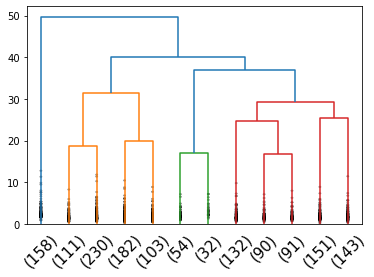

In [8]:
dendrogram(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 45., leaf_font_size = 15., show_contracted= True)
plt.show

**Interpretação**<br>
<br>
Na parte inferior, começamos com **12** pontos de dados, cada um atribuído a clusters separados. <br>
<br>
Dois aglomerados mais próximos são então mesclados até que tenhamos apenas um cluster no topo. A altura no dendrograma em que dois clusters são mesclados representa a distância entre dois clusters no espaço de dados.<br>
<br>
A decisão do número de clusters que melhor representem diferentes grupos podem ser escolhidos observando-se o dendrograma. A melhor escolha do número de clusters é o número de linhas verticais no dendrograma cortadas por uma linha horizontal que pode atravessar verticalmente a distância máxima sem intersectar um cluster.<br>
<br>
No exemplo acima, a melhor escolha de nº de clusters será **6** como a linha horizontal vermelha no dendrograma abaixo abrange distância vertical máxima AB:

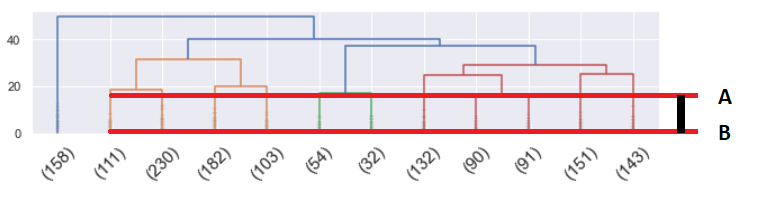

In [9]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'average')
grupo = hc.fit_predict(X)
grupo

array([4, 2, 2, ..., 4, 2, 2], dtype=int64)

In [10]:
df['grupo']=grupo
df

,ID,londdist,International,local,idade,n_filhos,salario,churn,pagamento_conta_corrente,pagamento_debito em conta,tipo_fatura_via_email,plano_padrao,sexo_M,estado_civil_S,carro_Y,grupo
0,0,-0.893541,2.986730,0.639607,-0.024639,1.22614,-0.800244,Vol,1,0,0,1,0,0,1,4
1,3,-1.452156,-0.374036,-0.867525,-0.331187,1.22614,0.504354,InVol,0,0,1,0,0,1,0,2
2,4,-0.860531,-0.374036,-0.768356,0.457079,1.22614,1.079992,Vol,0,0,1,0,0,0,0,2
3,8,0.040644,2.166104,-0.394362,-1.031868,-1.19986,1.307391,atuais,0,0,1,1,1,1,1,4
4,10,0.002842,0.947910,-0.342573,0.106739,1.22614,1.158053,Vol,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,4991,-1.452156,-0.374036,-0.926266,0.763627,-1.19986,-0.321868,InVol,0,0,0,1,0,0,0,2
1473,4993,-1.452156,-0.374036,-0.919387,1.639479,1.22614,0.095191,Vol,0,0,0,1,0,1,1,2
1474,4996,-0.485068,2.774307,-0.701090,0.544665,0.01314,1.227413,Vol,1,0,0,1,0,0,1,4
1475,4998,0.956727,-0.374036,-0.468342,-0.900490,-1.19986,-1.357363,Current,0,0,1,1,1,0,0,2


**Método Não Hieráriquico de Clusterização**

**K-MEANS**

In [11]:
from sklearn.cluster import KMeans
import mglearn
from sklearn.datasets import make_blobs

In [12]:
km = KMeans(n_clusters=6)

In [13]:
y_predicted = km.fit_predict(X)

In [14]:
df['grupo'] = y_predicted
df

,ID,londdist,International,local,idade,n_filhos,salario,churn,pagamento_conta_corrente,pagamento_debito em conta,tipo_fatura_via_email,plano_padrao,sexo_M,estado_civil_S,carro_Y,grupo
0,0,-0.893541,2.986730,0.639607,-0.024639,1.22614,-0.800244,Vol,1,0,0,1,0,0,1,3
1,3,-1.452156,-0.374036,-0.867525,-0.331187,1.22614,0.504354,InVol,0,0,1,0,0,1,0,4
2,4,-0.860531,-0.374036,-0.768356,0.457079,1.22614,1.079992,Vol,0,0,1,0,0,0,0,4
3,8,0.040644,2.166104,-0.394362,-1.031868,-1.19986,1.307391,atuais,0,0,1,1,1,1,1,3
4,10,0.002842,0.947910,-0.342573,0.106739,1.22614,1.158053,Vol,0,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,4991,-1.452156,-0.374036,-0.926266,0.763627,-1.19986,-0.321868,InVol,0,0,0,1,0,0,0,5
1473,4993,-1.452156,-0.374036,-0.919387,1.639479,1.22614,0.095191,Vol,0,0,0,1,0,1,1,4
1474,4996,-0.485068,2.774307,-0.701090,0.544665,0.01314,1.227413,Vol,1,0,0,1,0,0,1,3
1475,4998,0.956727,-0.374036,-0.468342,-0.900490,-1.19986,-1.357363,Current,0,0,1,1,1,0,0,1


In [15]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

C:\Users\Maria Tereza Boada\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


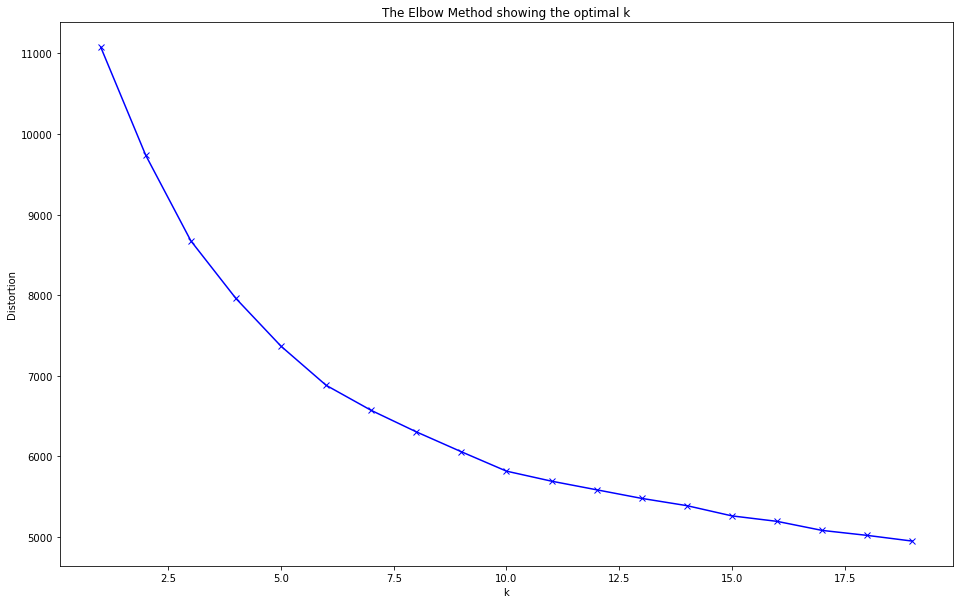

In [16]:
plt.figure(figsize=(16,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Interpretação** <br>O número ótimo de clusters parece mesmo ser 6.

**Diferença entre K Means e Hierarchical Clustering**
<br>
O armazenamento em cluster hierárquico não pode manipular dados grandes, mas o armazenamento em cluster K Means pode. Isso ocorre porque a complexidade de tempo de K means é linear, ou seja, O (n), enquanto que o de clusterização hierárquica é quadrático, ou seja, O (n 2 ).
Em K Means clustering, uma vez que começamos com a escolha aleatória de clusters, os resultados produzidos pela execução do algoritmo várias vezes podem ser diferentes. Enquanto os resultados são reproduzíveis em clustering hierárquico.
K means que funciona bem quando a forma dos clusters é hiper esférica (como círculo em 2D, esfera em 3D).
Clusterização KMeans requer conhecimento prévio de K ou seja, nº. de clusters nos quais você deseja dividir seus dados. Mas, você pode parar em qualquer número de clusters que você achar apropriado em clustering hierárquico, interpretando o dendrograma